## 0. 데이터 준비

In [1]:
# !pip install pandas mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [3]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [4]:
df.shape

(202772, 12)

In [5]:
df_age = df[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 8)

In [6]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_63612/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [7]:
df_v1 = df_age[df_age['품목대분류'] == '완구 및 게임용품']
df_v1['품목대분류'].unique()

array(['완구 및 게임용품'], dtype=object)

In [8]:
df_v1 = df_v1[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head()

,성별,범주형 나이,범주형 발생일,위해원인,위해증상,위해부위,발생장소
20897,여자,60-64,20201111-20,기타 물리적 충격,찰과상,(부위)발가락,주택 - 거실
20898,여자,35-39,20201201-10,기타 물리적 충격,타박상,(부위)발,주택 - 침실/방
20899,남자,0-4,20200101-10,부딪힘,열상(찢어짐),(부위)생식기 주변 및 회음부,주택 - 침실/방
20900,남자,35-39,20200311-20,기타 물리적 충격,열상(찢어짐),(부위)머리 및 뇌(뇌막),주택 - 침실/방
20901,남자,5-9,20200201-10,기타 물리적 충격,뇌진탕,(부위)머리 및 뇌(뇌막),주택 - 침실/방


In [9]:
df_v1 = df_v1.drop(columns=['범주형 발생일'])
df_v1

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
20897,여자,60-64,기타 물리적 충격,찰과상,(부위)발가락,주택 - 거실
20898,여자,35-39,기타 물리적 충격,타박상,(부위)발,주택 - 침실/방
20899,남자,0-4,부딪힘,열상(찢어짐),(부위)생식기 주변 및 회음부,주택 - 침실/방
20900,남자,35-39,기타 물리적 충격,열상(찢어짐),(부위)머리 및 뇌(뇌막),주택 - 침실/방
20901,남자,5-9,기타 물리적 충격,뇌진탕,(부위)머리 및 뇌(뇌막),주택 - 침실/방
...,...,...,...,...,...,...
202654,남자,30-34,미끄러짐·넘어짐,열상(찢어짐),(부위)이마,"도로 및 인도 - 상세불명의 장소, 부대·부속시설"
202689,남자,5-9,추락,열상(찢어짐),(부위)머리 및 뇌(뇌막),"여가, 문화 및 놀이시설 - 놀이터"
202692,남자,5-9,미끄러짐·넘어짐,타박상,"(부위)팔(아래부분, 팔꿈치 및 손목 제외)","여가, 문화 및 놀이시설 - 놀이터"
202707,남자,0-4,미끄러짐·넘어짐,타박상,"(부위)팔(아래부분, 팔꿈치 및 손목 제외)","주택 - 기타 장소, 부대·부속시설"


## 1. 빈발항목 분석

In [10]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
df_encoded.shape

(15263, 206)

In [12]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자           9023
0-4          7418
여자           6205
5-9          5975
미끄러짐·넘어짐     4966
추락           3820
열상(찢어짐)      3774
체내 위험 이물질    3721
주택 - 놀이터     2929
(부위)코        2878
dtype: int64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPy

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

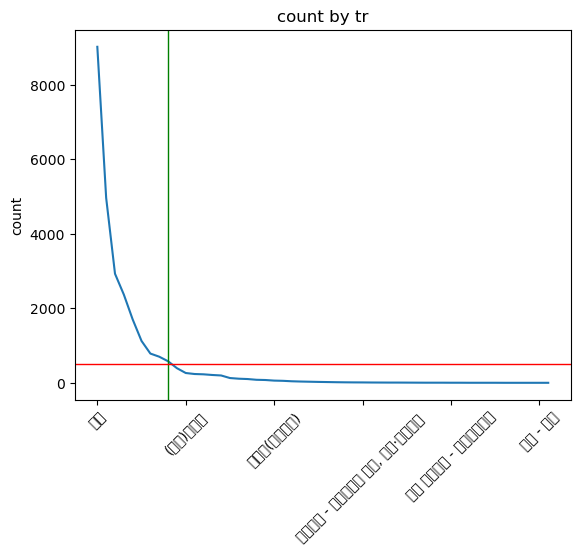

In [13]:
from matplotlib import rc  
rc('font', family='NanumGothic')  
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
# plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=8, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()
# (15263, 417)
# 8%(33/417)의 항목 3%(500/15263*100) 발생 -> min_support=0.03 으로 해보자

In [14]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets

,support,itemsets
0,0.406539,(여자)
1,0.177357,(주택 - 거실 )
2,0.144270,(타박상)
3,0.111511,(주택 - 침실/방 )
4,0.591168,(남자)
5,0.486012,(0-4)
6,0.247265,(열상(찢어짐))
7,0.104829,(부딪힘)
8,0.147088,((부위)머리 및 뇌(뇌막))
9,0.391470,(5-9)


##### 빈발항목집합 분석

- 여자 (support: 0.406539) // 남자 (support: 0.591168): 성별과 관련한 사고 발생 빈도에 있어서 남자가 더 빈번히 일어남

-  0-4세 (support: 0.486012): 완구 품목인 만큼 어린 아이들이 관련된 사고가 매우 빈번하게 발생함을 시사

- 5-9세 (support: 0.391470): 5-9세 아이들이 관련된 사고가 빈번하게 발생함

- 미끄러짐·넘어짐 (support: 0.325362): 미끄러짐·넘어짐 사고가 매우 자주 발생

- 열상(찢어짐) (support: 0.247265): 열상(찢어짐)이 흔히 발생하는 사고 유형임을 시사

종합 분석

성별 사고 발생 빈도: 남성과 여성 모두 사고 발생 빈도가 높지만, 남성의 사고 발생 빈도가 더 높음

연령대별 사고 발생 빈도: 0-4세와 5-9세 아이들이 관련된 사고가 빈번하게 발생함

사고 유형: 미끄러짐·넘어짐과 타박상이 빈번하게 발생하며, 열상(찢어짐)도 흔한 사고 유형임

사고 장소: 주택 내 거실과 침실/방, 놀이터에서 많은 사고가 발생함

In [15]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.406539,(여자),1
1,0.177357,(주택 - 거실 ),1
2,0.144270,(타박상),1
3,0.111511,(주택 - 침실/방 ),1
4,0.591168,(남자),1


In [16]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2

,support,itemsets,length
19,0.209002,"(0-4, 여자)",2
20,0.132739,"(주택 - 거실 , 0-4)",2
21,0.112232,"(주택 - 거실 , 체내 위험 이물질)",2
22,0.276944,"(남자, 0-4)",2
23,0.157767,"(남자, 열상(찢어짐))",2
24,0.125205,"(0-4, 열상(찢어짐))",2
25,0.115836,"(열상(찢어짐), 미끄러짐·넘어짐)",2
26,0.237765,"(남자, 5-9)",2
27,0.153574,"(여자, 5-9)",2
28,0.168250,"((부위)코, 체내 위험 이물질)",2


- (0-4, 남자) (support: 0.276944): 0~4세 남아가 사고에 노출되어 있음

- (0-4, 여자) (support: 0.209002): 0~세 여아 또한 사고에 노출되어 있음

-(미끄러짐·넘어짐, 남자) (support: 0.199371): 남성이 미끄러짐·넘어짐 사고를 겪는 경우가 19.94%의 비율로 발생

- (미끄러짐·넘어짐, 5-9) (support: 0.145646): 5-9세 아이가 미끄러짐·넘어짐 사고를 겪음. 

--> 성별 및 연령별 사고 발생 빈도: 0-4세 및 5-9세 아이들이 남성과 여성 모두에서 높은 사고 발생 빈도를 보임

--> 사고 유형: 미끄러짐·넘어짐, 열상(찢어짐), 추락, 체내 위험 이물질 사고가 빈번하게 발생

--> 사고 장소: 주택 내 거실, 침실/방, 놀이터에서 많은 사고가 발생함

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

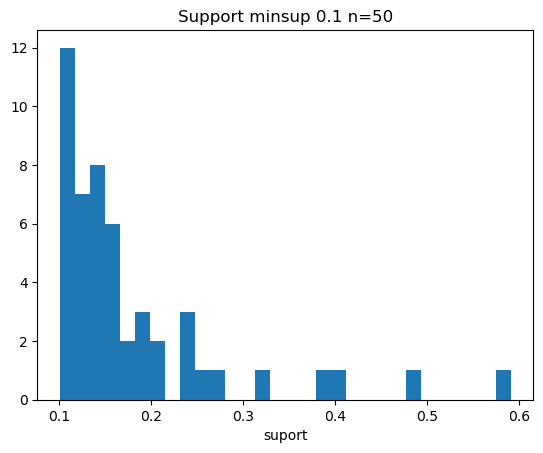

In [17]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsup {min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

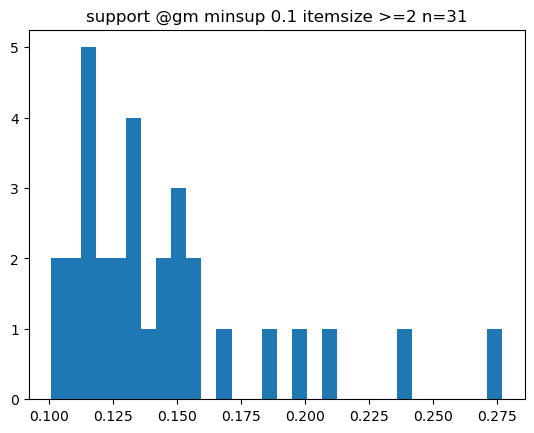

In [18]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'support @gm minsup {min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

## 2. 연관규칙 분석

In [19]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,"((부위)코, 이물질(플라스틱))",(체내 위험 이물질),0.116163,0.243792,0.116032,0.998872,4.097227,0.087713,670.378235,0.855285
22,"(이물질(플라스틱), 0-4)",(체내 위험 이물질),0.120291,0.243792,0.119374,0.992375,4.070577,0.090048,99.171254,0.857482
17,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316
34,"(도로 및 인도 - 상세불명의 장소, 부대·부속시설 )",(미끄러짐·넘어짐),0.141388,0.325362,0.135032,0.955051,2.935349,0.089030,15.008957,0.767896
10,"((부위)코, 0-4)",(체내 위험 이물질),0.154229,0.243792,0.144991,0.940102,3.856161,0.107391,12.624916,0.875739
7,((부위)코),(체내 위험 이물질),0.188561,0.243792,0.168250,0.892286,3.660028,0.122280,7.020536,0.895665
11,"((부위)코, 체내 위험 이물질)",(0-4),0.168250,0.486012,0.144991,0.861760,1.773125,0.063220,3.718088,0.524225
9,((부위)코),(0-4),0.188561,0.486012,0.154229,0.817929,1.682940,0.062586,2.823011,0.500101
12,"(0-4, 체내 위험 이물질)",((부위)코),0.186071,0.188561,0.144991,0.779225,4.132494,0.109906,3.675419,0.931304
23,"(이물질(플라스틱), 체내 위험 이물질)",(0-4),0.153705,0.486012,0.119374,0.776641,1.597988,0.044671,2.301176,0.442178


In [20]:
rules_conf_top = rules_conf.head(30)

##### 최소 신뢰도 0.5 이상의 항목 결과 분석

- (이물질(플라스틱), (부위)코) → (체내 위험 이물질): 이물질(플라스틱)이 코에 들어간 경우, 체내 위험 이물질일 확률이 매우 높음

- (0-4, 이물질(플라스틱)) → (체내 위험 이물질): 0-4세 어린이가 이물질(플라스틱)을 삼킨 경우, 체내 위험 이물질일 확률이 매우 높음

- (도로 및 인도 - 상세불명의 장소, 부대·부속시설) → (미끄러짐·넘어짐): 도로 및 인도에서 사고가 발생한 경우, 그 사고가 미끄러짐·넘어짐 사고일 확률이 높음


--> 이물질(플라스틱)과 관련된 모든 규칙이 높은 confidence와 lift 값을 가지며,어린이 사고와 강하게 연관됨

--> 0-4세 어린이와 관련된 사고가 많은 비율을 차지 특히, 체내 위험 이물질과 연관된 사고가 빈번하게 발생

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

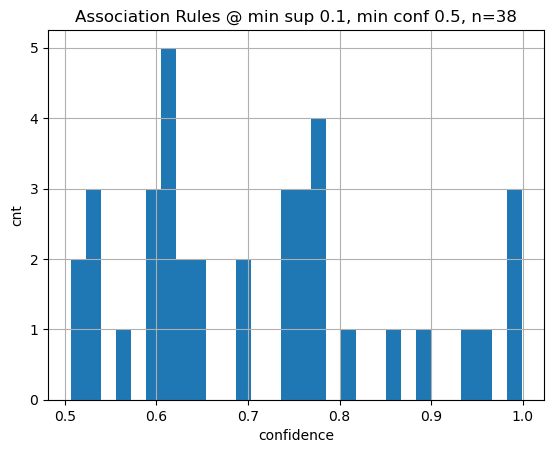

In [21]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

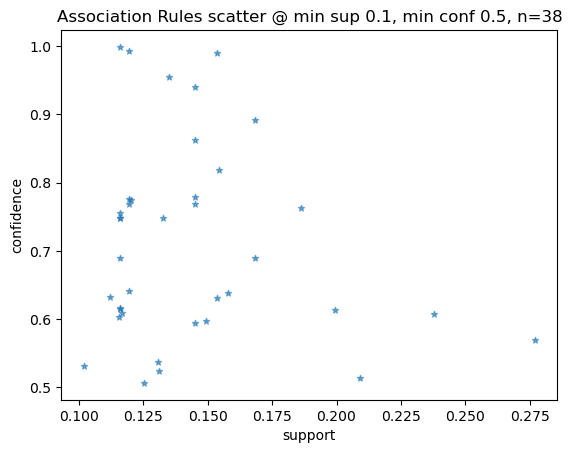

In [22]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

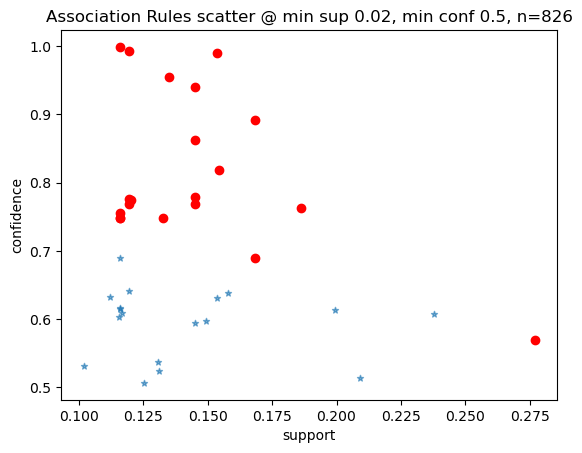

In [23]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [24]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
17,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316,1.143996
26,"((부위)코, 이물질(플라스틱))",(체내 위험 이물질),0.116163,0.243792,0.116032,0.998872,4.097227,0.087713,670.378235,0.855285,1.114904
22,"(이물질(플라스틱), 0-4)",(체내 위험 이물질),0.120291,0.243792,0.119374,0.992375,4.070577,0.090048,99.171254,0.857482,1.111748
34,"(도로 및 인도 - 상세불명의 장소, 부대·부속시설 )",(미끄러짐·넘어짐),0.141388,0.325362,0.135032,0.955051,2.935349,0.089030,15.008957,0.767896,1.090083
10,"((부위)코, 0-4)",(체내 위험 이물질),0.154229,0.243792,0.144991,0.940102,3.856161,0.107391,12.624916,0.875739,1.085093
7,((부위)코),(체내 위험 이물질),0.188561,0.243792,0.168250,0.892286,3.660028,0.122280,7.020536,0.895665,1.060536
11,"((부위)코, 체내 위험 이물질)",(0-4),0.168250,0.486012,0.144991,0.861760,1.773125,0.063220,3.718088,0.524225,1.006751
9,((부위)코),(0-4),0.188561,0.486012,0.154229,0.817929,1.682940,0.062586,2.823011,0.500101,0.972158
15,(체내 위험 이물질),(0-4),0.243792,0.486012,0.186071,0.763236,1.570405,0.067585,2.170885,0.480320,0.949307
12,"(0-4, 체내 위험 이물질)",((부위)코),0.186071,0.188561,0.144991,0.779225,4.132494,0.109906,3.675419,0.931304,0.924217


In [25]:
indices_to_drop = [3,1,23, 19, 15]
top_20_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316,1.143996
1,"((부위)코, 이물질(플라스틱))",(체내 위험 이물질),0.116163,0.243792,0.116032,0.998872,4.097227,0.087713,670.378235,0.855285,1.114904
2,"(이물질(플라스틱), 0-4)",(체내 위험 이물질),0.120291,0.243792,0.119374,0.992375,4.070577,0.090048,99.171254,0.857482,1.111748
3,"(도로 및 인도 - 상세불명의 장소, 부대·부속시설 )",(미끄러짐·넘어짐),0.141388,0.325362,0.135032,0.955051,2.935349,0.089030,15.008957,0.767896,1.090083
4,"((부위)코, 0-4)",(체내 위험 이물질),0.154229,0.243792,0.144991,0.940102,3.856161,0.107391,12.624916,0.875739,1.085093
5,((부위)코),(체내 위험 이물질),0.188561,0.243792,0.168250,0.892286,3.660028,0.122280,7.020536,0.895665,1.060536
6,"((부위)코, 체내 위험 이물질)",(0-4),0.168250,0.486012,0.144991,0.861760,1.773125,0.063220,3.718088,0.524225,1.006751
7,((부위)코),(0-4),0.188561,0.486012,0.154229,0.817929,1.682940,0.062586,2.823011,0.500101,0.972158
8,"(0-4, 체내 위험 이물질)",((부위)코),0.186071,0.188561,0.144991,0.779225,4.132494,0.109906,3.675419,0.931304,0.924217
9,((부위)코),"(0-4, 체내 위험 이물질)",0.188561,0.186071,0.144991,0.768937,4.132494,0.109906,3.522538,0.934161,0.913928


In [26]:
top_20_rules = top_20_rules.sort_values(by='confidence', ascending=False)
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
1,"((부위)코, 이물질(플라스틱))",(체내 위험 이물질),0.116163,0.243792,0.116032,0.998872,4.097227,0.087713,670.378235,0.855285,1.114904
2,"(이물질(플라스틱), 0-4)",(체내 위험 이물질),0.120291,0.243792,0.119374,0.992375,4.070577,0.090048,99.171254,0.857482,1.111748
0,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316,1.143996
3,"(도로 및 인도 - 상세불명의 장소, 부대·부속시설 )",(미끄러짐·넘어짐),0.141388,0.325362,0.135032,0.955051,2.935349,0.089030,15.008957,0.767896,1.090083
4,"((부위)코, 0-4)",(체내 위험 이물질),0.154229,0.243792,0.144991,0.940102,3.856161,0.107391,12.624916,0.875739,1.085093
5,((부위)코),(체내 위험 이물질),0.188561,0.243792,0.168250,0.892286,3.660028,0.122280,7.020536,0.895665,1.060536
6,"((부위)코, 체내 위험 이물질)",(0-4),0.168250,0.486012,0.144991,0.861760,1.773125,0.063220,3.718088,0.524225,1.006751
7,((부위)코),(0-4),0.188561,0.486012,0.154229,0.817929,1.682940,0.062586,2.823011,0.500101,0.972158
8,"(0-4, 체내 위험 이물질)",((부위)코),0.186071,0.188561,0.144991,0.779225,4.132494,0.109906,3.675419,0.931304,0.924217
10,(이물질(플라스틱)),"(0-4, 체내 위험 이물질)",0.155212,0.186071,0.119374,0.769101,4.133376,0.090493,3.525042,0.897346,0.888475


- 코에 이물질(플라스틱)이 있을 경우 이는 체내 위험 이물질일 확률이 매우 높다

- 0~4세 아동이 이물질(플라스틱)로 사고가 발생한 경우 체내 위험 이물질일 확률이 매우 높다

- 도로 및 인도에서 사고가 발생한 경우 이는 미끄러지거나 넘어졌을 확률이 매우 높다

- 0~4세 아동이 코 부위에 부상을 입은 경우 이는 체내 위험 이물질일 확률이 높다

~~ 같은 얘기 반복

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

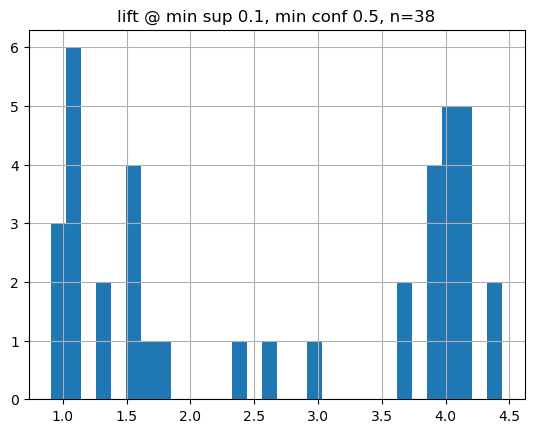

In [27]:
# 향상도 관찰
# 연관규칙의 향상도 분포
rules_conf.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [28]:
filter = rules_conf.lift.ge(3)
rules_conf[filter].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
30,(이물질(플라스틱)),"((부위)코, 체내 위험 이물질)",0.155212,0.168250,0.116032,0.747573,4.443226,0.089918,3.295010,0.917317,0.863605
27,"((부위)코, 체내 위험 이물질)",(이물질(플라스틱)),0.168250,0.155212,0.116032,0.689642,4.443226,0.089918,2.721977,0.931696,0.805674
25,(이물질(플라스틱)),"(0-4, 체내 위험 이물질)",0.155212,0.186071,0.119374,0.769101,4.133376,0.090493,3.525042,0.897346,0.888475
24,"(0-4, 체내 위험 이물질)",(이물질(플라스틱)),0.186071,0.155212,0.119374,0.641549,4.133376,0.090493,2.356776,0.931367,0.760923
12,"(0-4, 체내 위험 이물질)",((부위)코),0.186071,0.188561,0.144991,0.779225,4.132494,0.109906,3.675419,0.931304,0.924217
13,((부위)코),"(0-4, 체내 위험 이물질)",0.188561,0.186071,0.144991,0.768937,4.132494,0.109906,3.522538,0.934161,0.913928
26,"((부위)코, 이물질(플라스틱))",(체내 위험 이물질),0.116163,0.243792,0.116032,0.998872,4.097227,0.087713,670.378235,0.855285,1.114904
22,"(이물질(플라스틱), 0-4)",(체내 위험 이물질),0.120291,0.243792,0.119374,0.992375,4.070577,0.090048,99.171254,0.857482,1.111748
18,(체내 위험 이물질),(이물질(플라스틱)),0.243792,0.155212,0.153705,0.630476,4.062031,0.115866,2.286150,0.996839,0.784181
17,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316,1.143996


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

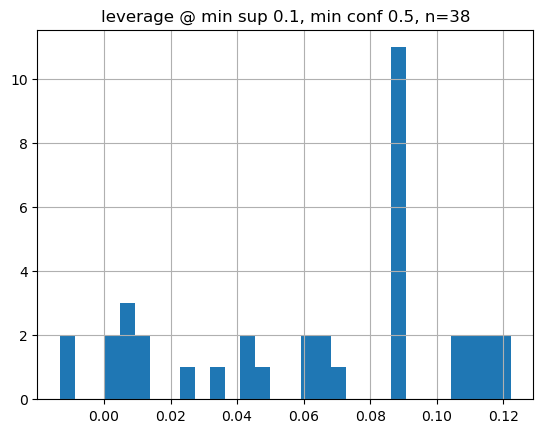

In [29]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
rules_conf.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [30]:
filter = rules_conf.leverage.ge(0.08)
rules_conf[filter].sort_values(by='leverage', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
7,((부위)코),(체내 위험 이물질),0.188561,0.243792,0.168250,0.892286,3.660028,0.122280,7.020536,0.895665,1.060536
8,(체내 위험 이물질),((부위)코),0.243792,0.188561,0.168250,0.690137,3.660028,0.122280,2.618704,0.961082,0.858387
17,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316,1.143996
18,(체내 위험 이물질),(이물질(플라스틱)),0.243792,0.155212,0.153705,0.630476,4.062031,0.115866,2.286150,0.996839,0.784181
12,"(0-4, 체내 위험 이물질)",((부위)코),0.186071,0.188561,0.144991,0.779225,4.132494,0.109906,3.675419,0.931304,0.924217
13,((부위)코),"(0-4, 체내 위험 이물질)",0.188561,0.186071,0.144991,0.768937,4.132494,0.109906,3.522538,0.934161,0.913928
10,"((부위)코, 0-4)",(체내 위험 이물질),0.154229,0.243792,0.144991,0.940102,3.856161,0.107391,12.624916,0.875739,1.085093
14,(체내 위험 이물질),"((부위)코, 0-4)",0.243792,0.154229,0.144991,0.594733,3.856161,0.107391,2.086945,0.979459,0.739724
24,"(0-4, 체내 위험 이물질)",(이물질(플라스틱)),0.186071,0.155212,0.119374,0.641549,4.133376,0.090493,2.356776,0.931367,0.760923
25,(이물질(플라스틱)),"(0-4, 체내 위험 이물질)",0.155212,0.186071,0.119374,0.769101,4.133376,0.090493,3.525042,0.897346,0.888475


In [31]:
'''# 확신 관찰
# 연관규칙의 확신 분포
rules_conv.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 있음'''

"# 확신 관찰\n# 연관규칙의 확신 분포\nrules_conv.hist('conviction', bins = 30)\nplt.title(f'convicition {txt}')\nplt.show()  #inf 값 있음"

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

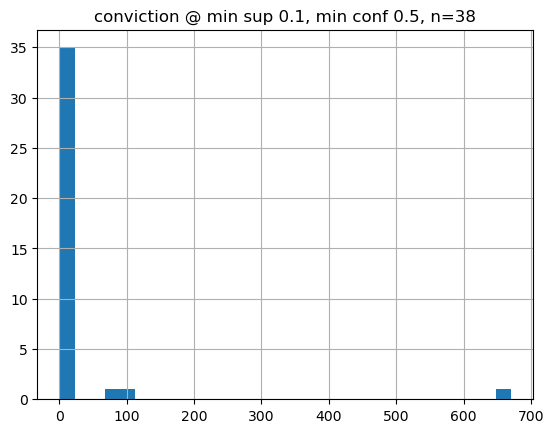

In [32]:
# conviction 값이 inf가 아닌 행들만 필터링
filtered_rules_conv = rules_conf[rules_conf['conviction'] != float('inf')]

# 히스토그램 시각화
filtered_rules_conv.hist('conviction', bins=30)
plt.title(f'conviction {txt}')
plt.show()

In [33]:
filter = rules_conf.conviction.ge(30)
rules_conf[filter].sort_values(by='conviction', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
26,"((부위)코, 이물질(플라스틱))",(체내 위험 이물질),0.116163,0.243792,0.116032,0.998872,4.097227,0.087713,670.378235,0.855285,1.114904
22,"(이물질(플라스틱), 0-4)",(체내 위험 이물질),0.120291,0.243792,0.119374,0.992375,4.070577,0.090048,99.171254,0.857482,1.111748
17,(이물질(플라스틱)),(체내 위험 이물질),0.155212,0.243792,0.153705,0.990291,4.062031,0.115866,77.889406,0.892316,1.143996


In [35]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_20_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules_완구.html")

association_rules_완구.html


##### 종합 분석

-어린이 안전: 0-4세 어린이의 사고 빈도가 높고, 또 5~9세 어린의 사고 빈도 또한 높다

- 공공장소: 도로 및 인도에서의 미끄러짐·넘어짐 사고가 빈번히 발생 >> 인라인스케이트라고 유추

- 남성과 여성 모두에서 0-4세 및 5-9세 어린이의 사고 빈도가 높음

- 주택 내 거실, 침실/방, 놀이터에서 발생하는 사고가 빈번함. >> 완구용품은 주로 집에서 많이 갖고 놀고 아님 놀이터 나가서 놀기에. 
